In [5]:
import nengo
from nengo.processes import WhiteSignal
from tanh_neuron import TanhWithBias
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

In [3]:
SEED = 0

with nengo.Network(seed=SEED) as train_model:
    in_nd = nengo.Node(WhiteSignal(10, high=5))
    ens = nengo.Ensemble(200, 1, neuron_type=TanhWithBias())
    nengo.Connection(in_nd, ens)
    
    p_target = nengo.Probe(in_nd)
    p_spikes = nengo.Probe(ens.neurons)

In [6]:
with nengo.Simulator(train_model) as sim_train:
    sim_train.run(10)

In [7]:
# calculate the decoders
solver = nengo.solvers.LstsqL2(reg=0.02)
decoders, _ = solver(sim_train.data[p_spikes], sim_train.data[p_target])

In [8]:
with nengo.Network(seed=SEED) as test_model:
    in_nd = nengo.Node(lambda t: np.sin(2*np.pi*t*5))
    ens = nengo.Ensemble(200, 1, neuron_type=TanhWithBias())
    nengo.Connection(in_nd, ens)
    
    p_target = nengo.Probe(in_nd)
    p_spikes = nengo.Probe(ens.neurons)

In [9]:
with nengo.Simulator(test_model) as sim_test:
    sim_test.run(2)

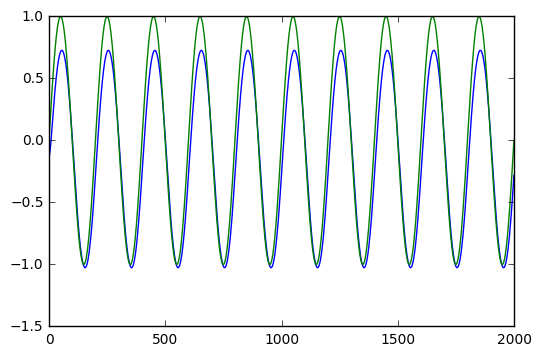

In [12]:
out_sig = np.dot(sim_test.data[p_spikes], decoders)
plt.plot(out_sig)
plt.plot(sim_test.data[p_target])

In [13]:
with nengo.Network() as base_model:
    in_nd = nengo.Node(lambda t: np.sin(2*np.pi*t*5))
    ens = nengo.Ensemble(200, 1)
    nengo.Connection(in_nd, ens)
    
    p_out = nengo.Probe(ens, synapse=0.01)

In [14]:
with nengo.Simulator(base_model) as sim_base:
    sim_base.run(2)

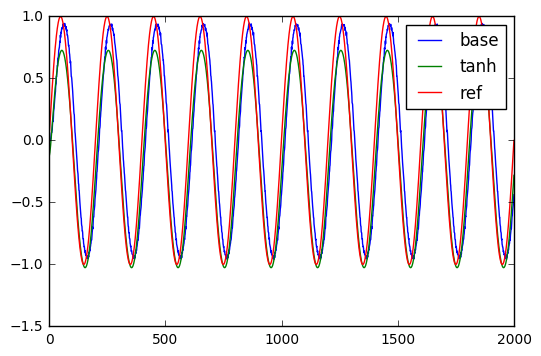

In [15]:
plt.plot(sim_base.data[p_out])
plt.plot(out_sig)
plt.plot(sim_test.data[p_target])
plt.legend(["base", "tanh", "ref"])